In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import logging
import absl.logging
logging.root.removeHandler(absl.logging._absl_handler)
absl.logging._warn_preinit_stderr = False
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

In [2]:
import sys
sys.path.append('..')

In [3]:
from caracteres.src.data.emnist_dataset import EMNIST
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from collections import defaultdict

In [4]:
dataset = EMNIST()
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [5]:
print(dataset)
print('Training shape:', x_train.shape, y_train.shape)
print('Test shape:', x_test.shape, y_test.shape)

EMNIST Dataset
Num classes: 62
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}
Input shape: [28, 28]

Training shape: (336299, 28, 28) (336299, 62)
Test shape: (55789, 28, 28) (55789, 62)


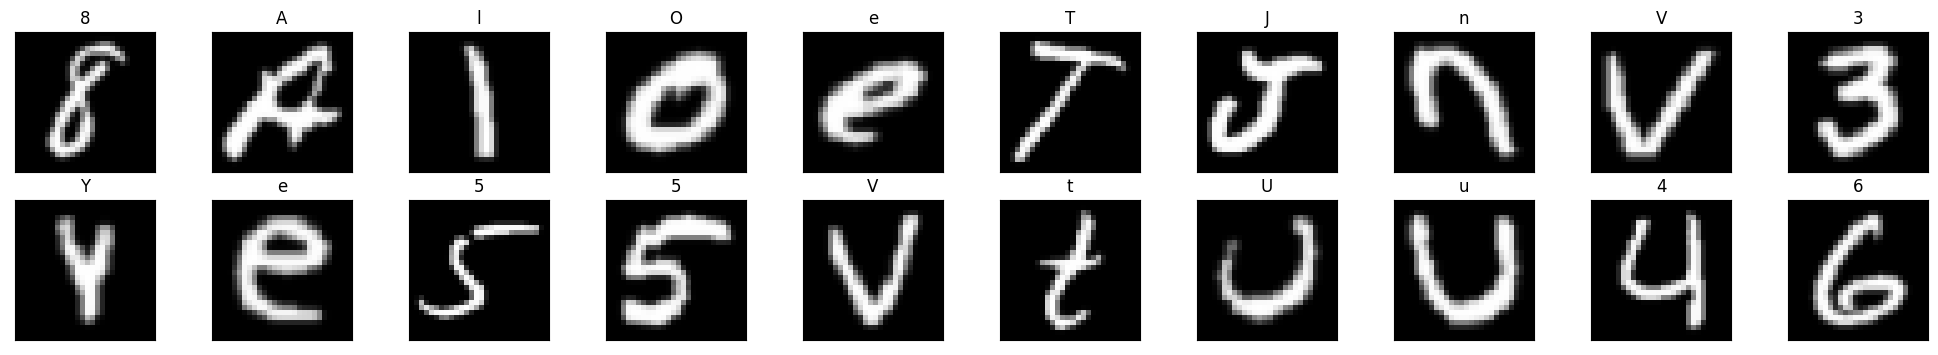

In [6]:
classes = dataset.mapping
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
rnd_ind = np.random.randint(low=0, high=len(x_train), size=20)
for idx, i in enumerate(rnd_ind):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(classes[np.where(y_train[i]==1)[0][0]]))

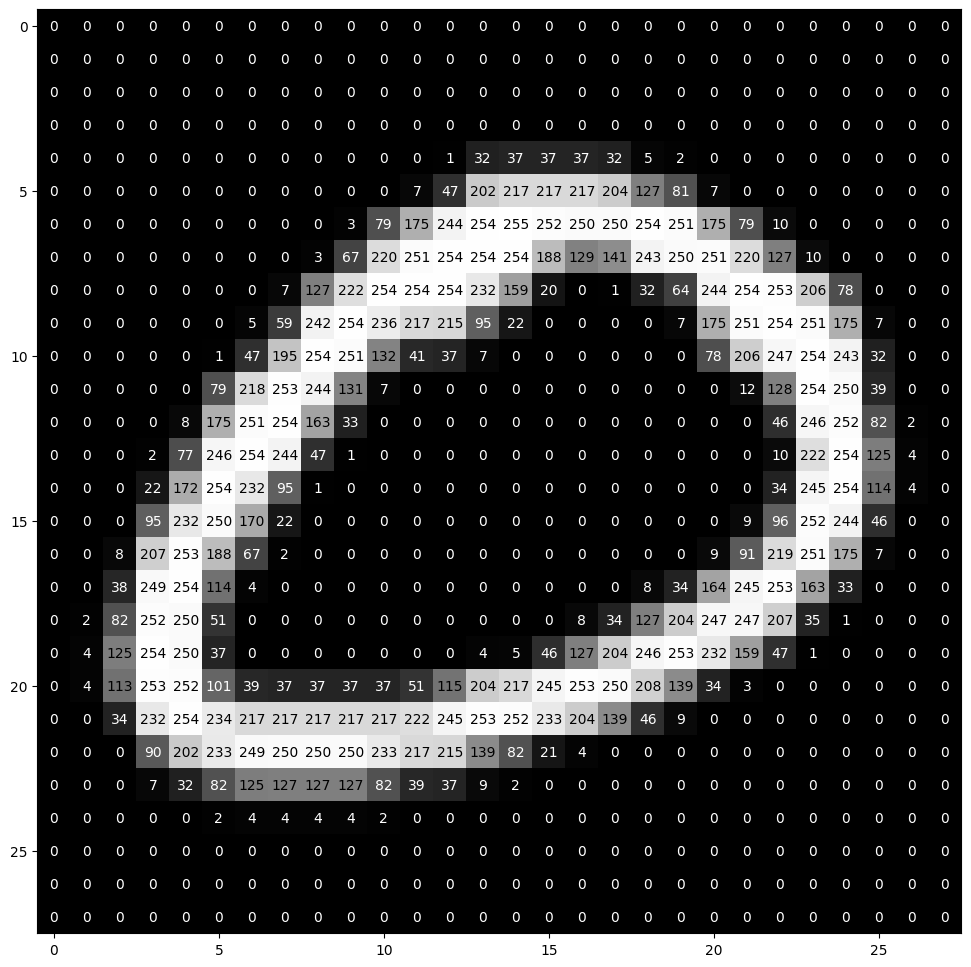

In [7]:
img = x_train[1]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [8]:
def distribution(labels, classes):
    
    lbl_dist = dict.fromkeys(value for key,value in classes.items())
    lbl_dist = defaultdict(lambda:1)
    for idx in tqdm(range(len(labels))):
        lbl_dist[classes[np.where(labels[idx]==1)[0][0]]] += 1
    return lbl_dist

In [9]:
distribution(y_train, classes)

100%|██████████| 336299/336299 [00:01<00:00, 234383.57it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>()>,
            {'0': 9635,
             '1': 9712,
             '2': 9584,
             '3': 9612,
             '4': 9627,
             '5': 9446,
             '6': 9567,
             '7': 9627,
             '8': 9587,
             '9': 9570,
             'A': 5333,
             'B': 3670,
             'C': 6828,
             'D': 4191,
             'E': 4414,
             'F': 6458,
             'G': 2488,
             'H': 3064,
             'I': 7267,
             'J': 3565,
             'K': 2439,
             'L': 4539,
             'M': 6416,
             'N': 6144,
             'O': 9159,
             'P': 6210,
             'Q': 2577,
             'R': 4526,
             'S': 8660,
             'T': 6737,
             'U': 7463,
             'V': 4240,
             'W': 4285,
             'X': 2714,
             'Y': 4304,
             'Z': 2660,
             'a': 6757,
             'b': 4566,
             'c': 2793

In [10]:
distribution(y_test, classes)

100%|██████████| 55789/55789 [00:00<00:00, 242987.03it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>()>,
            {'0': 1603,
             '1': 1605,
             '2': 1573,
             '3': 1598,
             '4': 1613,
             '5': 1563,
             '6': 1602,
             '7': 1603,
             '8': 1611,
             '9': 1624,
             'A': 883,
             'B': 619,
             'C': 1145,
             'D': 713,
             'E': 750,
             'F': 1037,
             'G': 439,
             'H': 504,
             'I': 1219,
             'J': 598,
             'K': 381,
             'L': 738,
             'M': 1053,
             'N': 1016,
             'O': 1476,
             'P': 1014,
             'Q': 412,
             'R': 725,
             'S': 1441,
             'T': 1104,
             'U': 1234,
             'V': 732,
             'W': 739,
             'X': 429,
             'Y': 717,
             'Z': 456,
             'a': 1110,
             'b': 759,
             'c': 428,
             'd'

In [11]:
from numpy.random import seed
seed(42)
tf.random.set_seed(42)

In [15]:
#Generan los weights de los modelos entrenados y las fotos de sus valores ya lo tenemos guardados en models
#! python caracteres/src/training/train_model.py -b 2048 -n lenet -find_lr True
#! python caracteres/src/training/train_model.py -b 2048 -e 50 -n resnet
#! python caracteres/src/training/train_model.py -b 2048 -e 50 -n customCNN

# Pruebas

In [16]:
from keras.models import load_model
from caracteres.src.networks.lenet import lenet
from caracteres.src.networks.resnet import resnet
from caracteres.src.networks.custom import customCNN
from sklearn.metrics import classification_report

In [17]:
classes = [value for value in dataset.mapping.values()]
batch_size = 2048

In [18]:
def test_generator(batch_size):
    num_iters = int(np.ceil(x_test.shape[0] / batch_size))
    while 1:
        for i in range(num_iters):
            tmp = x_test[i*batch_size:(i+1)*batch_size].astype('float32')
            tmp /= 255.0
            yield tmp, y_test[i*batch_size:(i+1)*batch_size]

In [19]:
def evaluate_model(weights_dir, network):
    model = network(dataset.input_shape, dataset.output_shape) 
    model.load_weights(weights_dir)
    num_iters = int(np.ceil(x_test.shape[0] / batch_size))
    t_generator = test_generator(batch_size=batch_size)

    # evaluate the network and show a classification report
    print("[INFO] evaluating network...")
    predictions = model.predict_generator(t_generator, steps=num_iters)
    print(classification_report(y_test.argmax(axis=1),
                                predictions.argmax(axis=1), 
                                target_names=classes))
    return model

In [20]:
weights_lenet_dir = 'caracteres/models/Character_Model_EMNIST_lenet_weights.h5'
weights_resnet_dir = 'caracteres/models/Character_Model_EMNIST_resnet_weights.h5'
weights_custom_dir = 'caracteres/models/Character_Model_EMNIST_customCNN_weights.h5'

In [21]:
model_lenet = evaluate_model(weights_lenet_dir, lenet)

[INFO] evaluating network...


C:\Users\Angel\AppData\Local\Temp\ipykernel_27424\2306152339.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(t_generator, steps=num_iters)


              precision    recall  f1-score   support

           0       0.53      0.81      0.64      1602
           1       0.35      0.15      0.21      1604
           2       0.90      0.80      0.85      1572
           3       0.97      0.88      0.92      1597
           4       0.83      0.79      0.81      1612
           5       0.91      0.78      0.84      1562
           6       0.78      0.95      0.86      1601
           7       0.97      0.55      0.70      1602
           8       0.49      0.98      0.65      1610
           9       0.80      0.42      0.55      1623
           A       0.63      0.95      0.76       882
           B       0.60      0.95      0.74       618
           C       0.66      0.46      0.54      1144
           D       0.74      0.81      0.77       712
           E       0.69      0.95      0.80       749
           F       0.74      0.47      0.58      1036
           G       0.70      0.85      0.77       438
           H       0.85    

c:\Users\Angel\Documents\github\reconocimiento-texto\lineas\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angel\Documents\github\reconocimiento-texto\lineas\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angel\Documents\github\reconocimiento-texto\lineas\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [22]:
model_resnet = evaluate_model(weights_resnet_dir, resnet)

[INFO] evaluating network...


C:\Users\Angel\AppData\Local\Temp\ipykernel_27424\2306152339.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(t_generator, steps=num_iters)


              precision    recall  f1-score   support

           0       0.44      0.56      0.49      1602
           1       0.00      0.00      0.00      1604
           2       0.97      0.36      0.53      1572
           3       0.96      0.32      0.48      1597
           4       0.86      0.50      0.63      1612
           5       0.77      0.35      0.48      1562
           6       0.85      0.41      0.55      1601
           7       0.96      0.12      0.21      1602
           8       0.65      0.90      0.76      1610
           9       0.86      0.04      0.08      1623
           A       0.60      0.68      0.64       882
           B       0.14      0.98      0.25       618
           C       0.25      0.41      0.31      1144
           D       0.50      0.72      0.59       712
           E       0.31      0.97      0.47       749
           F       0.37      0.22      0.27      1036
           G       0.30      0.49      0.37       438
           H       0.71    

c:\Users\Angel\Documents\github\reconocimiento-texto\lineas\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angel\Documents\github\reconocimiento-texto\lineas\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Angel\Documents\github\reconocimiento-texto\lineas\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [23]:
model_custom = evaluate_model(weights_custom_dir, customCNN)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 re_lu (ReLU)                (None, 26, 26, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)       

C:\Users\Angel\AppData\Local\Temp\ipykernel_27424\2306152339.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(t_generator, steps=num_iters)


              precision    recall  f1-score   support

           0       0.48      0.82      0.60      1602
           1       0.67      0.01      0.03      1604
           2       0.88      0.76      0.82      1572
           3       0.99      0.93      0.96      1597
           4       0.78      0.88      0.83      1612
           5       0.80      0.90      0.85      1562
           6       0.92      0.88      0.90      1601
           7       0.99      0.81      0.89      1602
           8       0.92      0.90      0.91      1610
           9       0.85      0.28      0.42      1623
           A       0.75      0.91      0.82       882
           B       0.72      0.97      0.83       618
           C       0.68      0.76      0.72      1144
           D       0.80      0.84      0.82       712
           E       0.53      0.96      0.68       749
           F       0.59      0.62      0.61      1036
           G       0.78      0.91      0.84       438
           H       0.73    

### Obtener un lote de imágenes de prueba

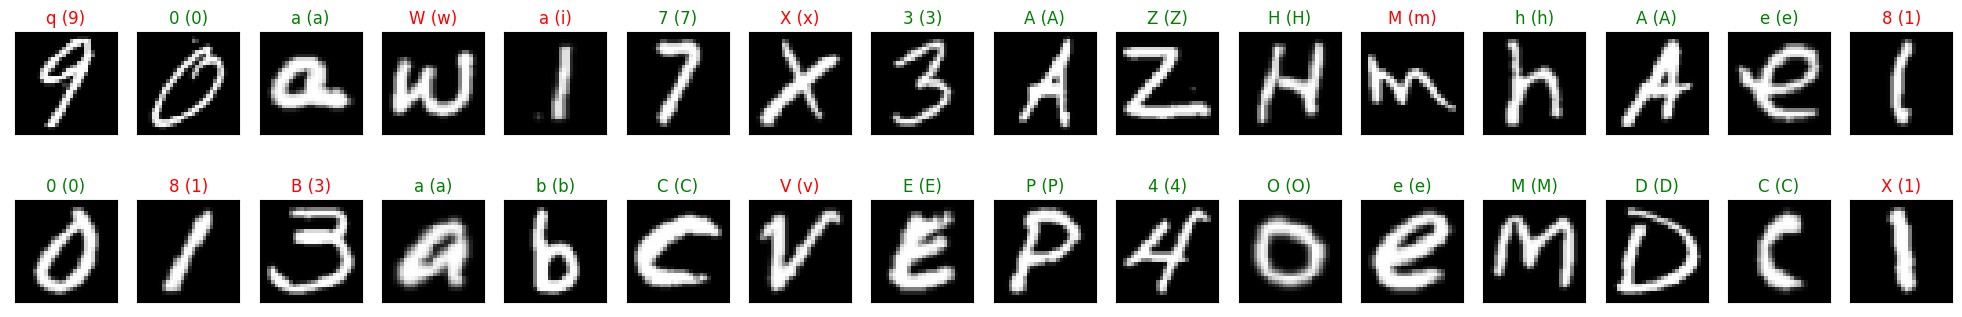

In [24]:
rnd_index = np.random.randint(low=0, high=len(x_test), size=32)
images, labels = x_test[rnd_index], y_test[rnd_index]

# get sample outputs
predict = model_lenet.predict_on_batch(images)
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(labels, axis=1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(32):
    ax = fig.add_subplot(2, int(32/2), idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape((28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(classes[preds[idx]]), str(classes[labels[idx]])),
                 color=("green" if preds[idx]==labels[idx] else "red"))